In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import pandas as pd

In [23]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke

def load_digits_data():
    digits = load_digits()
    return digits

data = load_digits_data()


In [24]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [25]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
df.shape

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

(1797, 64)

In [26]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int, random_state:int, digits):
    kmeans = KMeans(n_clusters = n_clusters, random_state = random_state)  # model

    y_pred = kmeans.fit_predict(digits.data)  # clusters

    return kmeans, y_pred


kmeans_pred = predict(10, 0, data)
# plt.scatter(data.data[:, 0], data.data[:, 1], c = kmeans_pred[1], s = 50, cmap = 'viridis')
# plt.show()


c:\Users\Fruzsi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
cc = kmeans_pred[0].cluster_centers_

cc.shape

(10, 64)

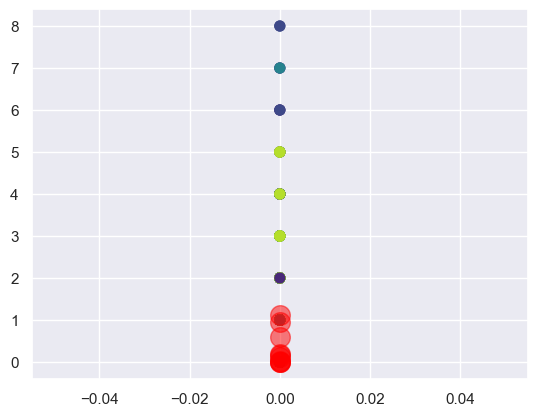

In [28]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti

centers = kmeans_pred[0].cluster_centers_
plt.scatter(data.data[:, 0], data.data[:, 1], c = kmeans_pred[1], s = 50, cmap = 'viridis')
#plt.show()
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5)
plt.show()

In [43]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits):
    result_array = np.zeros(len(clusters)) #kmeans_pred
    for i in range(len(clusters)):
        mask = (clusters == i)
    
        xd = data.target[mask]
    d_mode, kaki = mode(xd)

    result_array[mask] = d_mode
    print(d_mode)
    print(kaki)
    print(result_array)
    return result_array
        
        
pred_labels = get_labels(kmeans_pred[1], data)


[]
[]
[0. 0. 0. ... 0. 0. 0.]


C:\Users\Fruzsi\AppData\Local\Temp\ipykernel_27704\2825742673.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  d_mode, kaki = mode(xd)


In [96]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

def calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray):
    acc = accuracy_score(target_labels, predicted_labels)
    return acc.round(decimals=2)

calc_accuracy(data.target, pred_labels)

0.1

<Axes: >

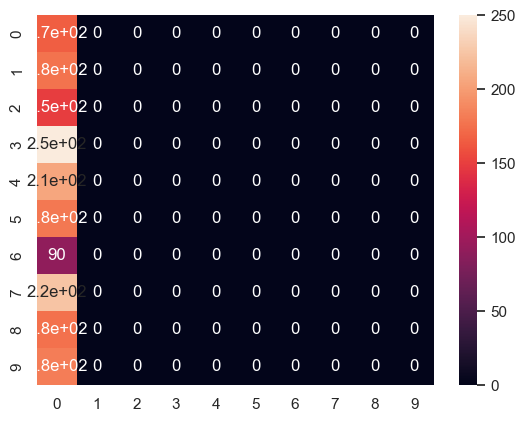

In [97]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

conf_matrix = confusion_matrix(kmeans_pred[1], pred_labels)
sns.heatmap(conf_matrix, annot = True)